In [81]:
import numpy as np
import pandas as pd
from mlxtend.plotting  import plot_decision_regions


In [82]:
df = pd.DataFrame()
df['x1'] = [1,0,3,2,7,9,6,7,5,9]
df['x2'] = [8,5,7,8,6,3,7,2,1,5]
df['target'] = [1,0,1,0,1,1,0,0,1,1]

In [83]:
df

,x1,x2,target
0,1,8,1
1,0,5,0
2,3,7,1
3,2,8,0
4,7,6,1
5,9,3,1
6,6,7,0
7,7,2,0
8,5,1,1
9,9,5,1


<Axes: xlabel='x1', ylabel='x2'>

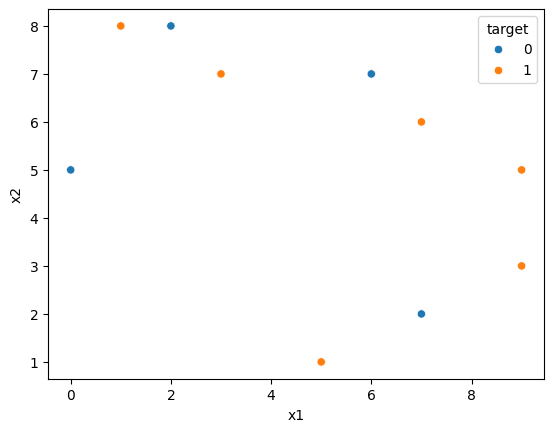

In [84]:
import seaborn as sns
sns.scatterplot(x=df['x1'],y = df['x2'],hue = df['target'])

In [85]:
df['weights'] = 1/df.shape[0]

In [86]:
df

,x1,x2,target,weights
0,1,8,1,0.1
1,0,5,0,0.1
2,3,7,1,0.1
3,2,8,0,0.1
4,7,6,1,0.1
5,9,3,1,0.1
6,6,7,0,0.1
7,7,2,0,0.1
8,5,1,1,0.1
9,9,5,1,0.1


In [87]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth = 1)

In [88]:
X = df.iloc[:,:2].values
y= df.iloc[:,2].values

In [89]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.625, 0.5, '  False')]

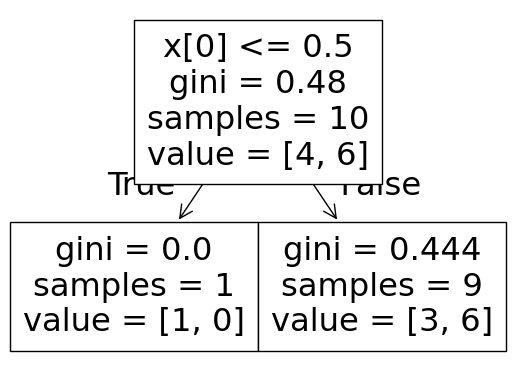

In [90]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

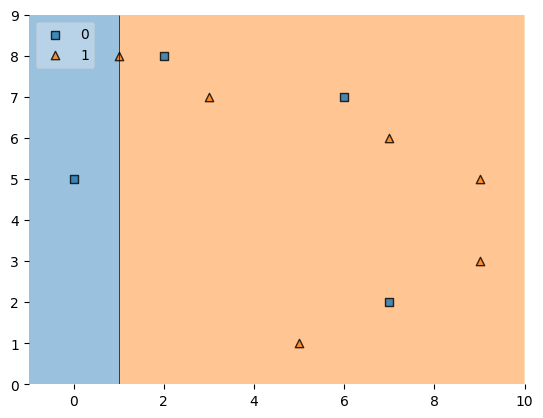

In [91]:
plot_decision_regions(X,y,clf=dt1,legend = 2)

In [92]:
df['y_pred'] = dt1.predict(X)

In [93]:
df

,x1,x2,target,weights,y_pred
0,1,8,1,0.1,1
1,0,5,0,0.1,0
2,3,7,1,0.1,1
3,2,8,0,0.1,1
4,7,6,1,0.1,1
5,9,3,1,0.1,1
6,6,7,0,0.1,1
7,7,2,0,0.1,1
8,5,1,1,0.1,1
9,9,5,1,0.1,1


## function for finding alpha from error

In [94]:
def calculate_model_weight(error):
  return 0.5 * np.log( (1 - error+0.00001 ) / (error+0.00001) )

In [95]:
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.4236394066108296)

## function for upadting weights

In [96]:
def update_weights(row,alpha = 0.423):
  if row['target'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)



In [97]:
df['updated_weights'] = df.apply(update_weights,axis = 1)


In [98]:
df

,x1,x2,target,weights,y_pred,updated_weights
0,1,8,1,0.1,1,0.065508
1,0,5,0,0.1,0,0.065508
2,3,7,1,0.1,1,0.065508
3,2,8,0,0.1,1,0.152653
4,7,6,1,0.1,1,0.065508
5,9,3,1,0.1,1,0.065508
6,6,7,0,0.1,1,0.152653
7,7,2,0,0.1,1,0.152653
8,5,1,1,0.1,1,0.065508
9,9,5,1,0.1,1,0.065508


In [99]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [100]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [101]:
df['normalized_weights'].sum()

np.float64(1.0)

In [102]:
df

,x1,x2,target,weights,y_pred,updated_weights,normalized_weights
0,1,8,1,0.1,1,0.065508,0.071475
1,0,5,0,0.1,0,0.065508,0.071475
2,3,7,1,0.1,1,0.065508,0.071475
3,2,8,0,0.1,1,0.152653,0.166559
4,7,6,1,0.1,1,0.065508,0.071475
5,9,3,1,0.1,1,0.065508,0.071475
6,6,7,0,0.1,1,0.152653,0.166559
7,7,2,0,0.1,1,0.152653,0.166559
8,5,1,1,0.1,1,0.065508,0.071475
9,9,5,1,0.1,1,0.065508,0.071475


In [103]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [104]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [105]:
df[['x1','x2','target','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,x1,x2,target,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,8,1,0.1,1,0.065508,0.000000,0.071475
1,0,5,0,0.1,0,0.065508,0.071475,0.142950
2,3,7,1,0.1,1,0.065508,0.142950,0.214425
3,2,8,0,0.1,1,0.152653,0.214425,0.380983
4,7,6,1,0.1,1,0.065508,0.380983,0.452458
5,9,3,1,0.1,1,0.065508,0.452458,0.523933
6,6,7,0,0.1,1,0.152653,0.523933,0.690492
7,7,2,0,0.1,1,0.152653,0.690492,0.857050
8,5,1,1,0.1,1,0.065508,0.857050,0.928525
9,9,5,1,0.1,1,0.065508,0.928525,1.000000


In [106]:
def create_dataset(df):
  indices = []

  for i in range(df.shape[0]):
    a= np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [107]:
index_values = create_dataset(df)
index_values

[6, 2, 1, 8, 3, 2, 7, 0, 3, 6]

In [108]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [109]:
second_df

,x1,x2,target,weights
6,6,7,0,0.1
2,3,7,1,0.1
1,0,5,0,0.1
8,5,1,1,0.1
3,2,8,0,0.1
2,3,7,1,0.1
7,7,2,0,0.1
0,1,8,1,0.1
3,2,8,0,0.1
6,6,7,0,0.1


In [110]:
dt2 = DecisionTreeClassifier(max_depth=1)


In [111]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [112]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 5.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.625, 0.5, '  False')]

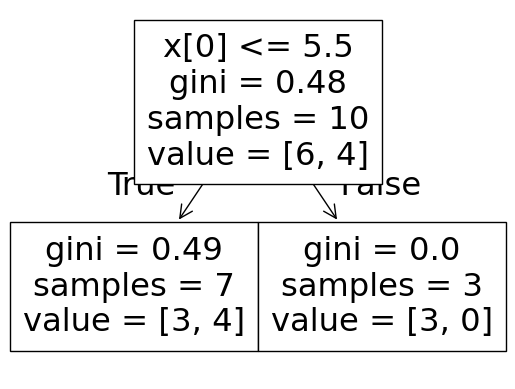

In [113]:
plot_tree(dt2)

<Axes: >

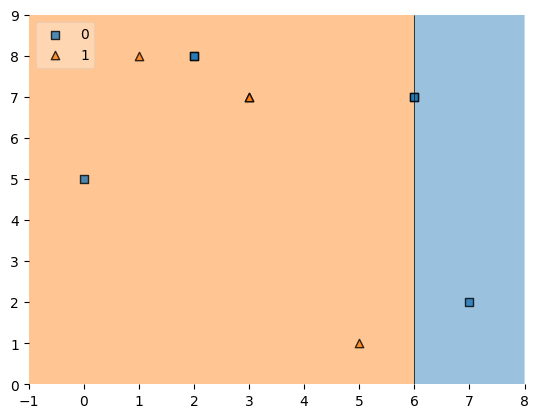

In [114]:
plot_decision_regions(X, y, clf=dt2, legend=2)


In [115]:
second_df['y_pred'] = dt2.predict(X)
second_df

,x1,x2,target,weights,y_pred
6,6,7,0,0.1,0
2,3,7,1,0.1,1
1,0,5,0,0.1,1
8,5,1,1,0.1,1
3,2,8,0,0.1,1
2,3,7,1,0.1,1
7,7,2,0,0.1,0
0,1,8,1,0.1,1
3,2,8,0,0.1,1
6,6,7,0,0.1,0


In [116]:
alpha2 = calculate_model_weight(0.2)

In [117]:
alpha2

np.float64(0.6931284311458622)

In [118]:
def update_row_weights(row,alpha=alpha2):
  if row['target'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)


In [119]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)


In [120]:
second_df

,x1,x2,target,weights,y_pred,updated_weights
6,6,7,0,0.1,0,0.050001
2,3,7,1,0.1,1,0.050001
1,0,5,0,0.1,1,0.199996
8,5,1,1,0.1,1,0.050001
3,2,8,0,0.1,1,0.199996
2,3,7,1,0.1,1,0.050001
7,7,2,0,0.1,0,0.050001
0,1,8,1,0.1,1,0.050001
3,2,8,0,0.1,1,0.199996
6,6,7,0,0.1,0,0.050001


In [121]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()


In [122]:
second_df

,x1,x2,target,weights,y_pred,updated_weights,nomalized_weights
6,6,7,0,0.1,0,0.050001,0.052633
2,3,7,1,0.1,1,0.050001,0.052633
1,0,5,0,0.1,1,0.199996,0.210523
8,5,1,1,0.1,1,0.050001,0.052633
3,2,8,0,0.1,1,0.199996,0.210523
2,3,7,1,0.1,1,0.050001,0.052633
7,7,2,0,0.1,0,0.050001,0.052633
0,1,8,1,0.1,1,0.050001,0.052633
3,2,8,0,0.1,1,0.199996,0.210523
6,6,7,0,0.1,0,0.050001,0.052633


In [123]:
second_df['nomalized_weights'].sum()

np.float64(1.0)

In [124]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [125]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']


In [126]:
second_df[['x1','x2','target','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]


,x1,x2,target,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
6,6,7,0,0.1,0,0.052633,0.000000,0.052633
2,3,7,1,0.1,1,0.052633,0.052633,0.105266
1,0,5,0,0.1,1,0.210523,0.105266,0.315789
8,5,1,1,0.1,1,0.052633,0.315789,0.368422
3,2,8,0,0.1,1,0.210523,0.368422,0.578945
2,3,7,1,0.1,1,0.052633,0.578945,0.631578
7,7,2,0,0.1,0,0.052633,0.631578,0.684211
0,1,8,1,0.1,1,0.052633,0.684211,0.736844
3,2,8,0,0.1,1,0.210523,0.736844,0.947367
6,6,7,0,0.1,0,0.052633,0.947367,1.000000


In [127]:
index_values = create_dataset(second_df)

In [128]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [129]:
third_df

,x1,x2,target,weights
8,5,1,1,0.1
1,0,5,0,0.1
7,7,2,0,0.1
8,5,1,1,0.1
8,5,1,1,0.1
8,5,1,1,0.1
2,3,7,1,0.1
7,7,2,0,0.1
0,1,8,1,0.1
8,5,1,1,0.1


In [130]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [131]:
X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [132]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

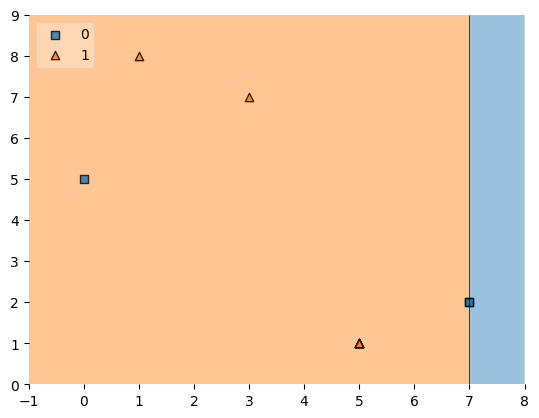

In [133]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [134]:
third_df['y_pred'] = dt3.predict(X)

In [135]:
third_df

,x1,x2,target,weights,y_pred
8,5,1,1,0.1,1
1,0,5,0,0.1,1
7,7,2,0,0.1,0
8,5,1,1,0.1,1
8,5,1,1,0.1,1
8,5,1,1,0.1,1
2,3,7,1,0.1,1
7,7,2,0,0.1,0
0,1,8,1,0.1,1
8,5,1,1,0.1,1


In [136]:
alpha3 = calculate_model_weight(0)
alpha3

np.float64(5.756467732460115)

In [137]:
print(alpha1,alpha2,alpha3)

0.4236394066108296 0.6931284311458622 5.756467732460115


# Prediction

In [141]:
query = np.array([3,7]).reshape(1,2)
dt1.predict(query)

array([1])

In [142]:
dt2.predict(query)

array([1])

In [143]:
dt3.predict(query)

array([1])

In [144]:
alpha1*(1) + alpha2*(1) + alpha3*(1)

np.float64(6.873235570216806)

In [145]:
np.sign(6.873)

np.float64(1.0)

In [146]:
query = np.array([7,2]).reshape(1,2)
dt1.predict(query)


array([1])

In [147]:
dt2.predict(query)


array([0])

In [148]:
dt3.predict(query)


array([0])

In [149]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

np.float64(-6.025956756995147)

In [150]:
np.sign(-6.025)

np.float64(-1.0)